In [4]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Notes on linear contextual bandit from The proof of the bound is adopted from the Youtube lecture [Bandit Algorithm - 1](https://www.youtube.com/watch?v=xN11-epRuSU&list=PLf6zO2kXw8HqVxnPXF7GF_otdhJg_vIl-) by Tor Lattimore.

### Contextual linear arm

Motivation: $k$ can be very large, which isn't good.

* Action set is $\mathcal{A}_t \subset \mathbb{R}^d$
* Choose action $A_t \in \mathcal{A}_t$
* Reward is $X_t = \langle A_t, \hat{\theta }\rangle + \eta_t$
* $\theta \in \mathbb{R}^d$ is unknown
* $\eta_t$ is the noise
* Lots of actions, but only $d$ unknown parameters.

How to tune $\theta$?

* $A_1, \cdots, A_t \in \mathbb{R}^d$
* $X_1, \cdots, X_t \in \mathbb{R}$

Tune $\theta$ via (regularized) least squares esitmator

\begin{align*}
\hat{\theta}_t = \arg \min_{\hat{\theta}} \sum_{t=1}^\theta (X_t - \langle A_t, \hat{\theta }\rangle )^2 + \lambda ||\hat{\theta}||_2^2
\end{align*}

Exercise, show $\hat{\theta}_t = G_t^{-1} S_t$

where

\begin{align*}
G_t 
&= \lambda I + \sum_{s=1}^t A_s A_s^T \\
S_t
&= \sum_{s=1}^t A_s X_s
\end{align*}

Note, with changing $\mathcal{A}_t$ changing from round to round as it incorporates user context, the definition of $\Re_n$ needs updated.

\begin{align*}
\Re_n = \mathbb{E}\left[ \sum_{t=1}^n \langle A_t^*, \theta \rangle - \langle A_t, \theta \rangle \right ]
\end{align*}

where

\begin{align*}
A_t^* = \arg\max_{a \in \mathcal{A}_t} \langle a, \theta \rangle
\end{align*}

When $\lambda = 0$ (no regularization),

* $\mathbb{E}[\hat{\theta}_t] = \theta$, unbiased
* $\mathbb{E}[\langle x, \hat{\theta}_t - \theta \rangle^2] = ||x||_{G_t^{-1}}^2 = x^T G_t^{-1}x$, variance

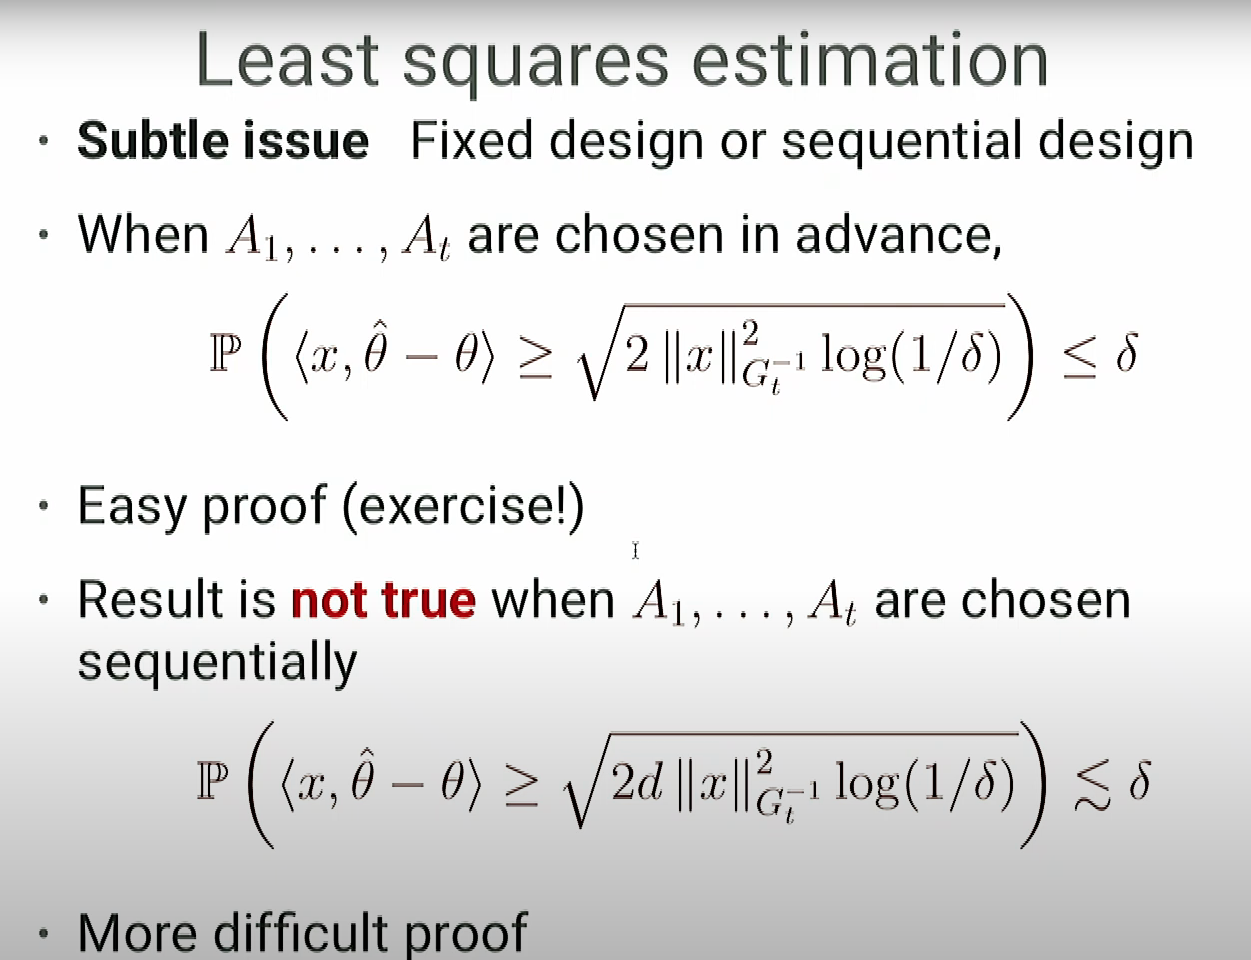

Note, $d$ is the dimension of the action space.

### UCB for contextual linear bandits

* Observe $\mathcal{A}_t$
* Choose $A_t = \arg \max_{a \in \mathcal{A}_t} \langle \hat{\theta}_t, a \rangle + \beta_t||a||_{G_{t - 1}}^{-1}$ (UCB), where $\beta_t \approx \sqrt{d \log t}$
* Observe $X_t$ and update least squares estimator

Bounding the regret

\begin{align*}
R_n = \mathbb{E}\left[ \sum_{t=1}^n \langle A_t^*, \theta \rangle - \langle A_t, \theta \rangle \right ] 
\end{align*}

At time $t$, using the UCB trick,

\begin{align*}
\langle \theta, A_t \rangle + 2 \beta_t ||A_t||_{G_{t- 1}}^{-1} 
&\ge \langle \hat{\theta}, A_t \rangle + \beta_t ||A_t||_{G_{t- 1}}^{-1} \\
&\ge \langle \hat{\theta}, A_t^* \rangle + \beta_t ||A_t^*||_{G_{t- 1}}^{-1} \\
&\ge \langle \theta, A_t^* \rangle \\
\langle \theta, A_t^* \rangle - \langle \theta, A_t \rangle
&\le 2 \beta_t ||A_t||_{G_{t- 1}}^{-1}
\end{align*}

With proper normalization so that $\langle \theta, A_t \rangle \le 1$ (Not sure what it means yet), then

\begin{align*}
\sum_{t=1}^n \langle \theta, A_t^* \rangle - \langle \theta, A_t \rangle 
&\le 2 \sum_{t = 1}^n \beta_t \min \left(1, ||A_t||_{G_{t-1}^{-1}} \right) \\
&\le 2 \beta_n \sum_{t = 1}^n \min \left(1, ||A_t||_{G_{t-1}^{-1}} \right)
\end{align*}

Note, $\beta_t \approx \sqrt{d \log t}$, so we bound $\beta_t$ with $\beta_n$ and pulled it outside the sum.

By Cauchy–Schwarz inequality,

\begin{align*}
\sum_{t = 1}^n \min \left(1, ||A_t||_{G_{t-1}^{-1}} \right)
&\le \sqrt{n \sum_{t=1}^n \min \left(1, ||A_t||_{G_{t-1}^{-1}}^2 \right)}
\end{align*}

(Note sure about how the inequality is applied yet)

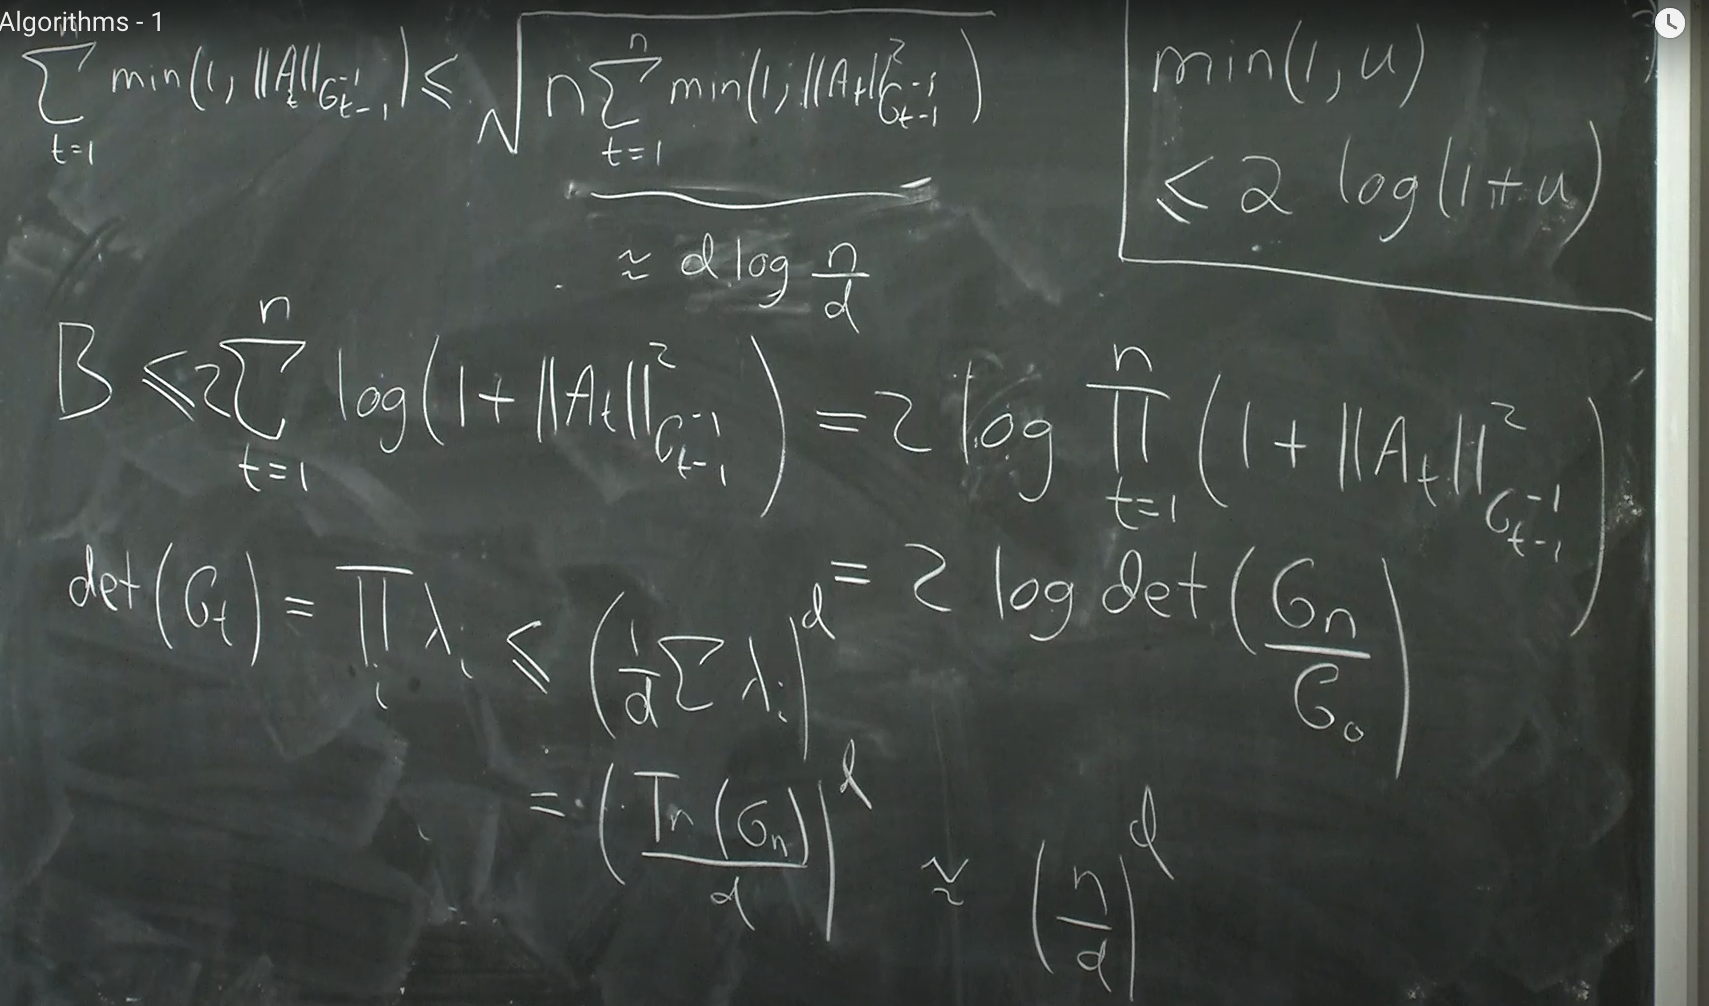

The bound is the form of $\Re_n = O(d \log n)$. There is also a lower bound to show this can't be improved. (understanding on this part is still very rough).